# Clustering
Below shows examples of clustering using hierarchical and CURE clustering methods in kdb+/q.

### Dependencies
To run the below notebook, the following dependencies are required.
```
- embedPy
- matplotlib
- matplot3d
- pyclustering
```

In [1]:
\l clust.q
plt:.p.import`matplotlib.pyplot

In [2]:
plot:{
 k::"i"$(n:count z)%2;
 subplots::plt[`:subplots][2;k];
 fig::subplots[@;0];
 axarr::subplots[@;1];
 fig[`:set_size_inches;18.5;8.5];
 {[d;c;f;i]
  ishc:2~count f;
  s:.z.t;
  r:$[ishc;.clust.hc;.clust.cure][d;c;] . f;
  t:.z.t-s;
  j:cross[til 2;til k]i;
  box:axarr[@;j 0][@;j 1];
  {x[`:scatter][;]. flip y}[box]each exec pts by clt from r;
  box[`:set_title]"df/",$[ishc;["lf: ",string[f 0],"/",string f 1];["C: ",string[f 0],"/",string[f 3],"b"]]," - ",string t;
  }[x;y]'[z;til n];
 plt[`:show][];
 }

### Example 1

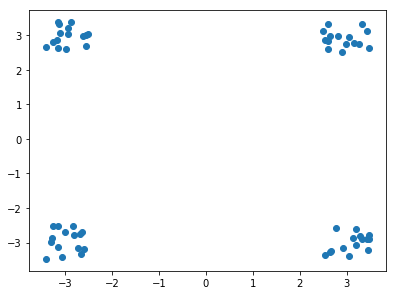

In [3]:
d1:(60#"F";",")0:`:../data/ss5.csv
plt[`:scatter][;]. flip d1;
plt[`:show][];

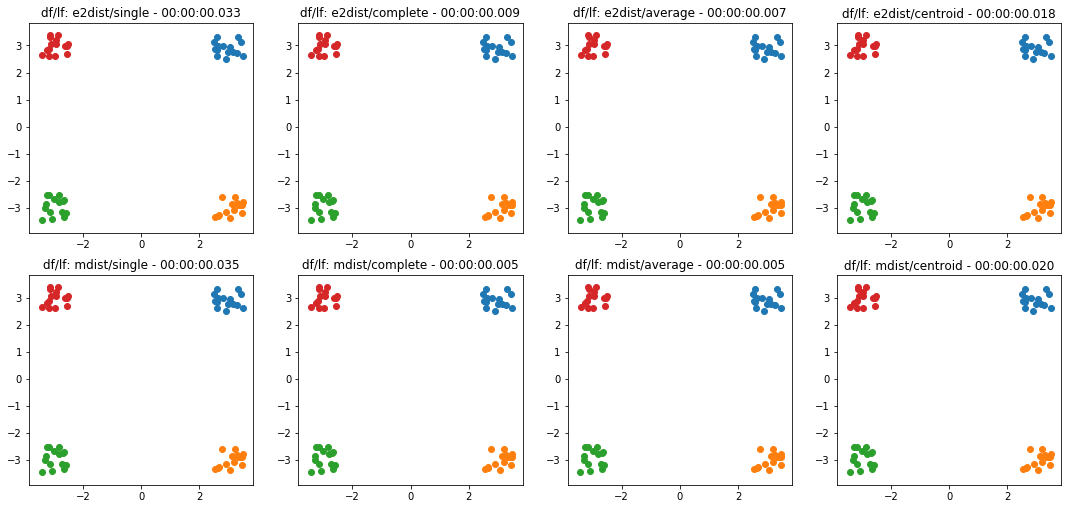

In [4]:
/single, complete, average, centroid with euclidean squared and manhattan distances
plot[d1;4;cross[`e2dist`mdist;-1_key .clust.kd.i.ld]]

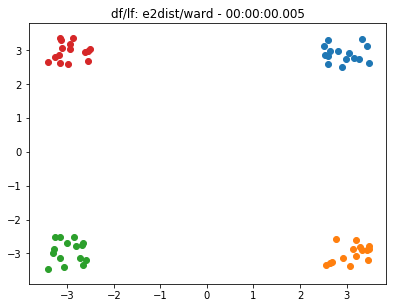

In [5]:
/ward - only works with euclidean distances
s:.z.t;
r1:.clust.hc[d1;4;`e2dist;`ward]
t:.z.t-s;
{plt[`:scatter][;]. flip x}each exec pts by clt from r1;
plt[`:title]"df/lf: e2dist/ward - ",string t;
plt[`:show][];

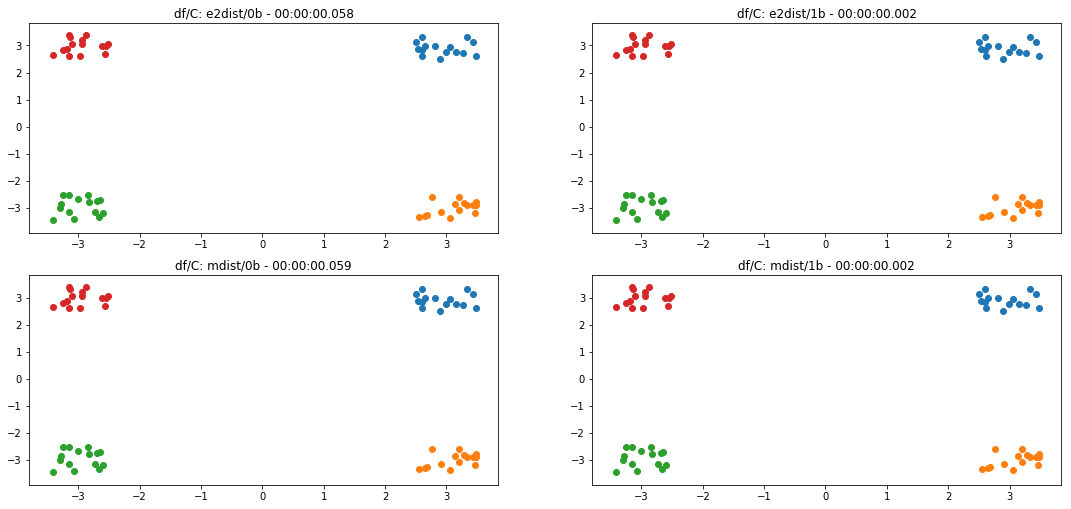

In [6]:
/cure - with and without C code, using euclidean squared and manhattan distances
plot[d1;4;(cross/)(`e2dist`mdist;5;0;01b)]

### Example 2

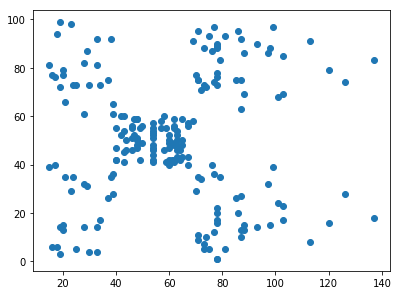

In [7]:
d2:("SSFFF";(),",")0:`:../data/cust.csv
d2:flip d2`Income`SpendingScore
plt[`:scatter][;]. flip d2;
plt[`:show][];

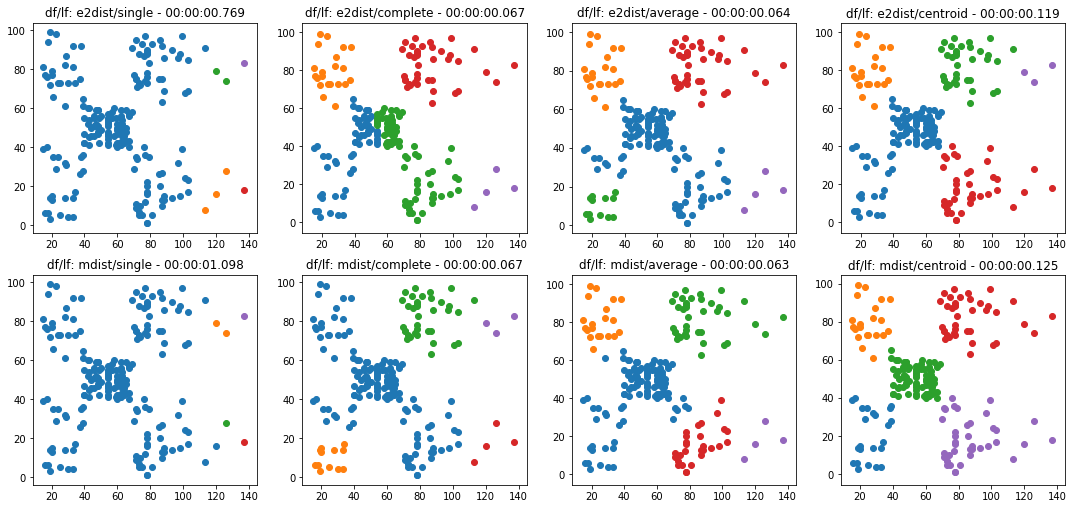

In [8]:
plot[d2;5;cross[`e2dist`mdist;-1_key .clust.kd.i.ld]]

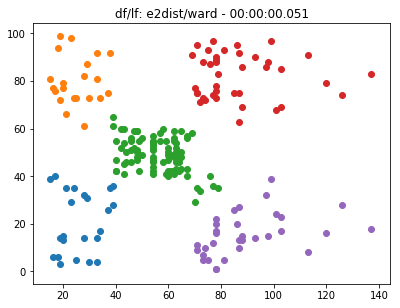

In [9]:
s:.z.t;
r2:.clust.hc[d2;5;`e2dist;`ward];
t:.z.t-s;
{plt[`:scatter][;]. flip x}each exec pts by clt from r2;
plt[`:title]"df/lf: e2dist/ward - ",string t;
plt[`:show][];

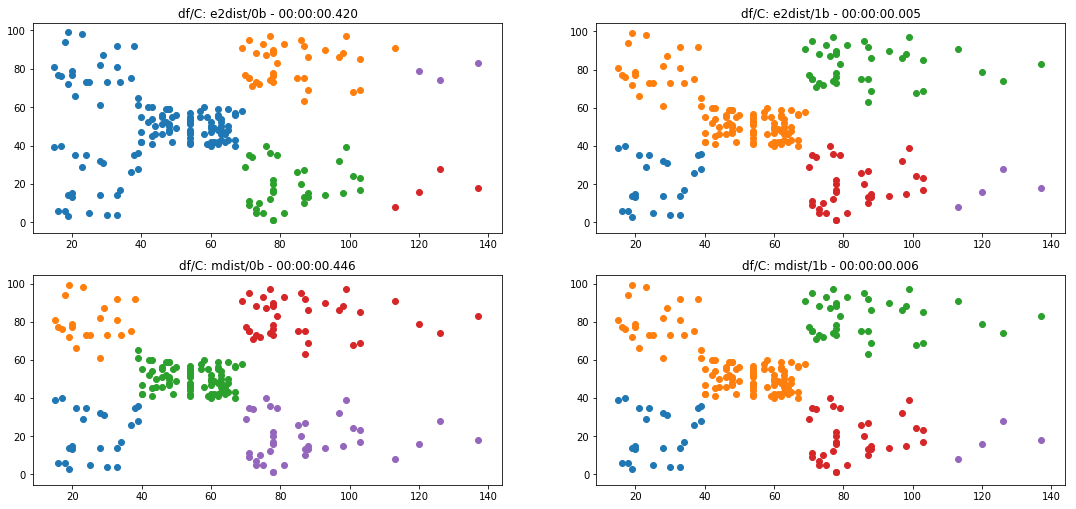

In [10]:
plot[d2;5;(cross/)(`e2dist`mdist;5;0.7;01b)]

### Example 3

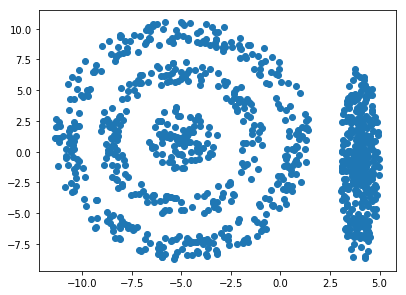

In [11]:
datapts:1000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
d3:data
plt[`:scatter][;]. flip d3;
plt[`:show][];

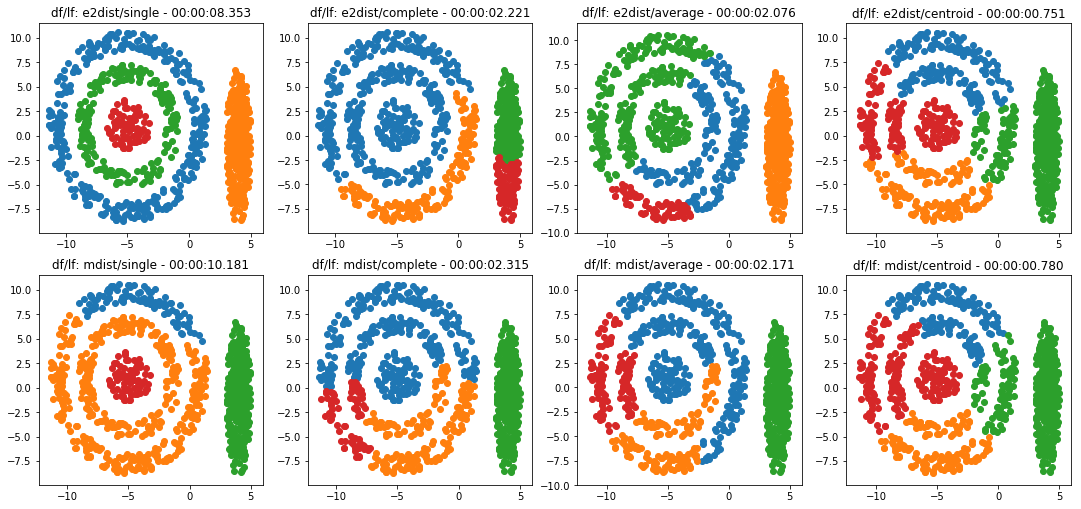

In [12]:
plot[d3;4;cross[`e2dist`mdist;-1_key .clust.kd.i.ld]]

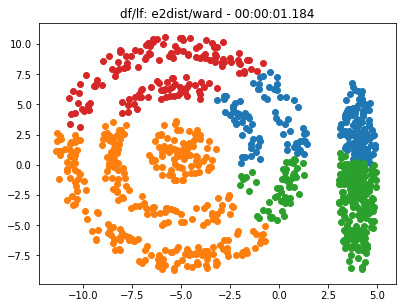

In [13]:
s:.z.t;
r3:.clust.hc[d3;4;`e2dist;`ward]
t:.z.t-s;
{plt[`:scatter][;]. flip x}each exec pts by clt from r3;
plt[`:title]"df/lf: e2dist/ward - ",string t;
plt[`:show][];

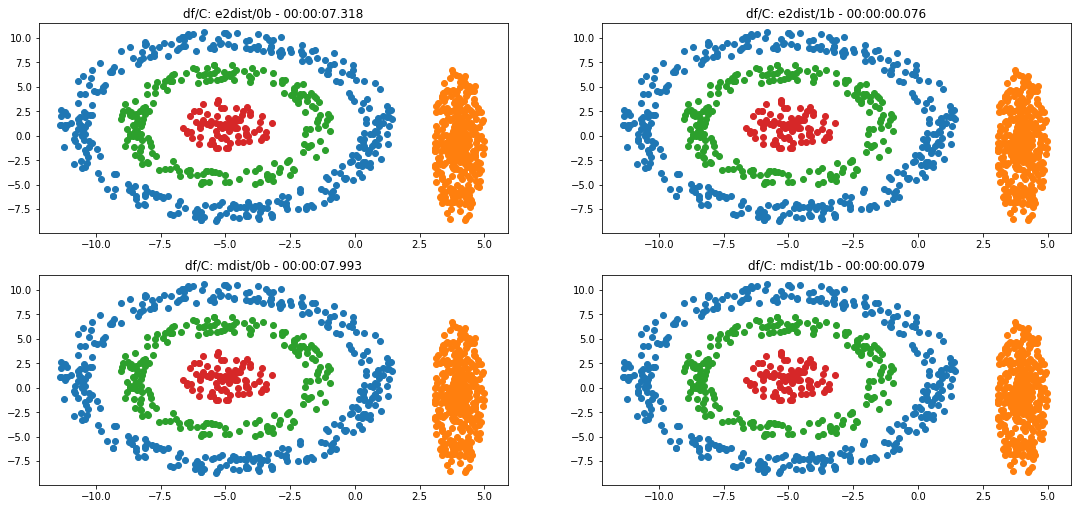

In [14]:
plot[d3;4;(cross/)(`e2dist`mdist;30;0;01b)]

### Example 4

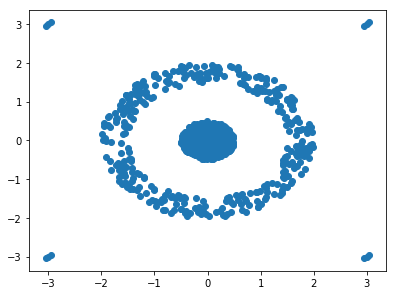

In [15]:
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample
d4:read[fcps`:SAMPLE_TARGET]`
plt[`:scatter][;]. flip d4;
plt[`:show][];

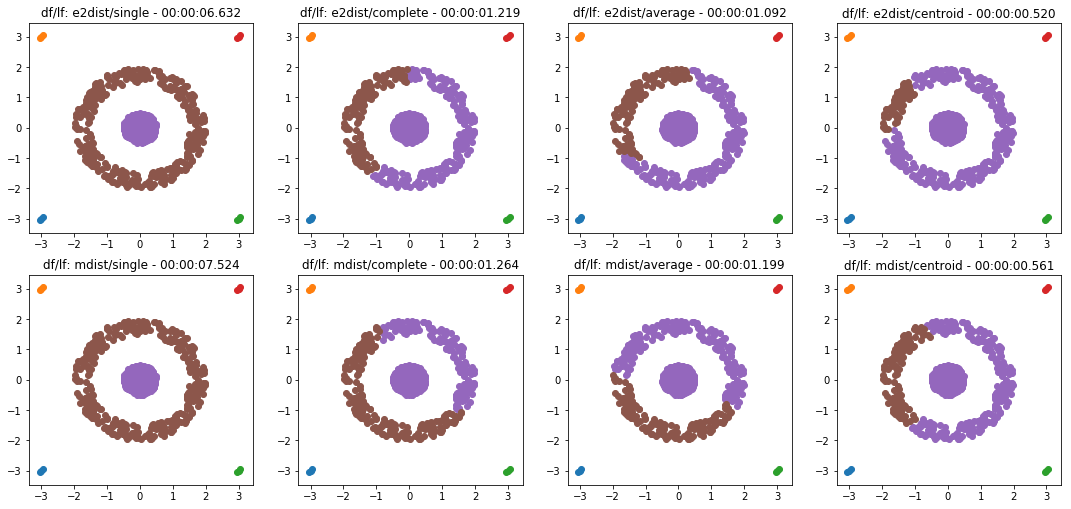

In [16]:
plot[d4;6;cross[`e2dist`mdist;-1_key .clust.kd.i.ld]]

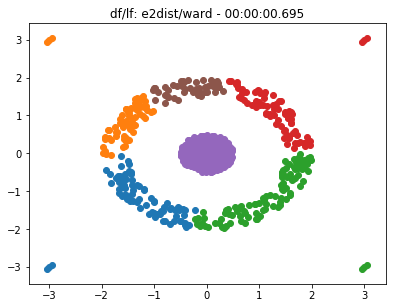

In [17]:
s:.z.t;
r4:.clust.hc[d4;6;`e2dist;`ward]
t:.z.t-s;
{plt[`:scatter][;]. flip x}each exec pts by clt from r4;
plt[`:title]"df/lf: e2dist/ward - ",string t;
plt[`:show][];

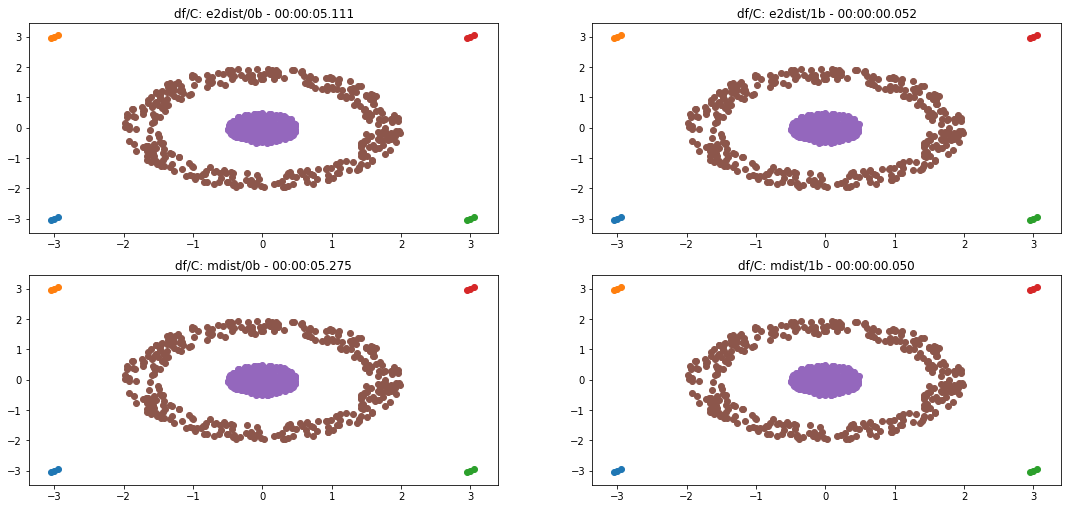

In [18]:
plot[d4;6;(cross/)(`e2dist`mdist;30;0;01b)]

### Example 5 - 3D

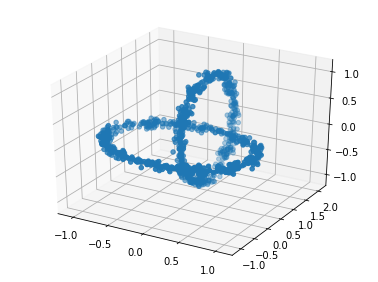

In [19]:
d5:read[fcps`:SAMPLE_CHAINLINK]`
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;]. flip d5;
plt[`:show][];

In [20]:
plot3d:{
 k::"i"$(n:count z)%2;
 fig::plt[`:figure][];
 fig[`:set_size_inches;18.5;10.5];
 {[d;c;f;i]
  ax:fig[`:add_subplot][2;k;i+1;`projection pykw"3d"];
  ishc:2~count f;
  s:.z.t;
  r:$[ishc;.clust.hc;.clust.cure][d;c;] . f;
  t:.z.t-s;
  {x[`:scatter][;;]. flip y}[ax]each exec pts by clt from r;
  ax[`:set_title]"df/lf: ",string[f 0],"/",$[ishc;string f 1;string[f 3],"b"]," - ",string t
  }[x;y]'[z;til n];
 plt[`:show][];
 }

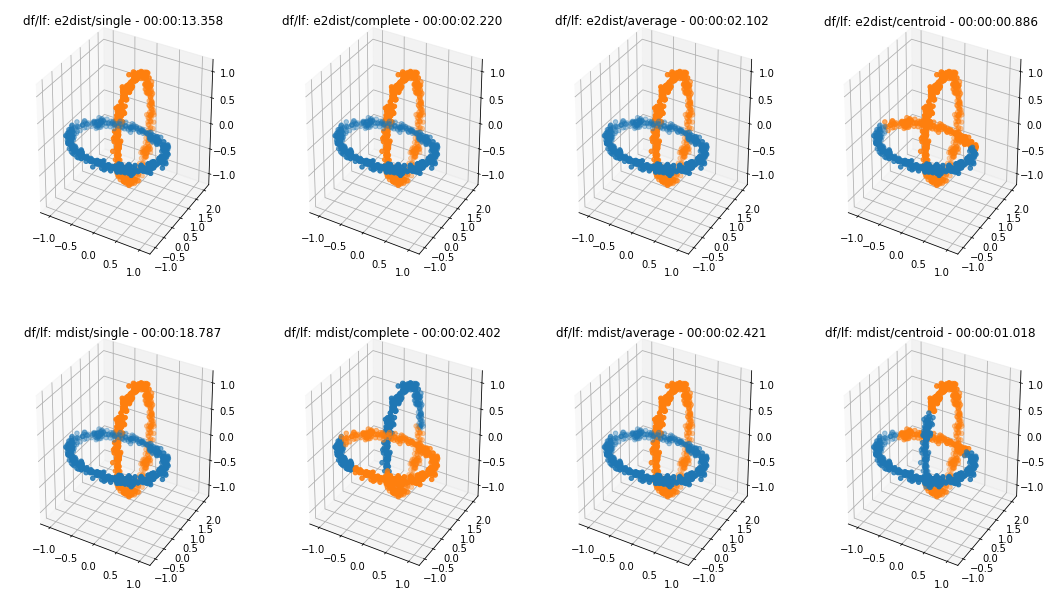

In [21]:
plot3d[d5;2;cross[`e2dist`mdist;-1_key .clust.kd.i.ld]]

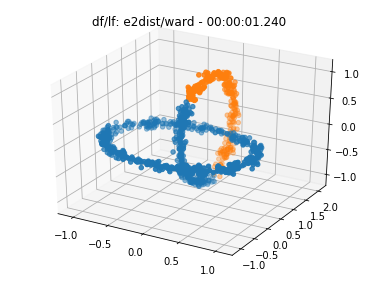

In [22]:
s:.z.t;
r5:.clust.hc[d5;2;`e2dist;`ward]
t:.z.t-s;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each exec pts by clt from r5;
plt[`:title]"df/lf: e2dist/ward - ",string t;
plt[`:show][];

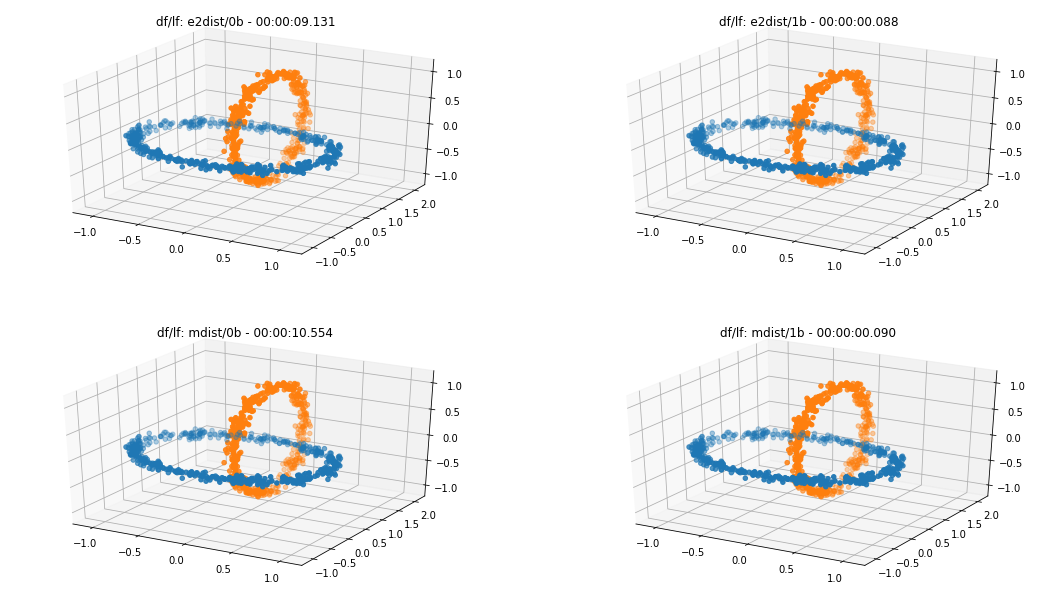

In [23]:
plot3d[d5;2;(cross/)(`e2dist`mdist;30;0;01b)];

---